# Continuous Control

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [ ]:
!pip -q install ./python

Importing necessary packages for the project

In [1]:
from unityagents import UnityEnvironment
import numpy as np
from ddpg_agent import Agent
import torch
from collections import deque
import matplotlib.pyplot as plt

The environments corresponding to both versions of the environment are already saved in the Workspace and can be accessed at the file paths provided below.  

Please select one of the two options below for loading the environment.

In [2]:
# select this option to load version 1 (with a single agent) of the environment
env = UnityEnvironment(file_name='Reacher')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 1
Size of each action: 4
There are 1 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726671e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

In [5]:
env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 0.9499999787658453


### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agents while they are training.  However, **_after training the agents_**, you can download the saved model weights to watch the agents on your own machine! 

In [6]:
agent = Agent(state_size=state_size, action_size=action_size, random_seed=10)

def ddpg(n_episodes=1000, max_t=1000, print_every=100, noise=True, train=True):
    """DDPG (Deep Deterministic Policy Gradient) Algorithm.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        print_every (int): frequency of printing information throughout iteration 
        noise (bool): whether or not adding noise to the execution 
        train (bool): whether the execution is a training or not
        """
    
    scores = []
    scores_deque = deque(maxlen=print_every)
    
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=train)[brain_name]
        agent.reset()
        state = env_info.vector_observations[0]            # get the current state
        score = 0
        t_steps = 0
        while True:
            action = agent.act(state, add_noise=noise)      # select an action
            action = np.clip(action, -1, 1)
            env_info = env.step(action)[brain_name]        # send the action to the environment
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # see if episode has finished
            if train:
                agent.step(state, action, reward, next_state, done) # take step with agent 
            score += reward                                # update the score
            state = next_state                             # roll over the state to next time step
            t_steps += 1
            print('\rEpisode {}\tScore: {:.2f}\tSteps: {}'.format(i_episode, score, t_steps), end="")
            if done:                                       # exit loop if episode finished
                break
        
        scores_deque.append(score)       # save most recent score
        scores.append(score)             # save most recent score

        print('\rEpisode {}\tAverage Score: {:.2f}\tSteps: {}'.format(i_episode, np.mean(scores_deque), t_steps))
        
        #if i_episode % print_every == 0:
        #    print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
        #    torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
        #    torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
        
        if np.mean(scores_deque)>=30.0 and train:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            break
            
    return scores

scores = ddpg()

Episode 1	Average Score: 0.35	Steps: 1001
Episode 2	Average Score: 0.64	Steps: 1001
Episode 3	Average Score: 0.62	Steps: 1001
Episode 4	Average Score: 0.63	Steps: 1001
Episode 5	Average Score: 0.55	Steps: 1001
Episode 6	Average Score: 0.53	Steps: 1001
Episode 7	Average Score: 0.57	Steps: 1001
Episode 8	Average Score: 0.62	Steps: 1001
Episode 9	Average Score: 0.59	Steps: 1001
Episode 10	Average Score: 0.82	Steps: 1001
Episode 11	Average Score: 0.90	Steps: 1001
Episode 12	Average Score: 1.24	Steps: 1001
Episode 13	Average Score: 1.30	Steps: 1001
Episode 14	Average Score: 1.47	Steps: 1001
Episode 15	Average Score: 1.50	Steps: 1001
Episode 16	Average Score: 1.49	Steps: 1001
Episode 17	Average Score: 1.46	Steps: 1001
Episode 18	Average Score: 1.42	Steps: 1001
Episode 19	Average Score: 1.39	Steps: 1001
Episode 20	Average Score: 1.32	Steps: 1001
Episode 21	Average Score: 1.30	Steps: 1001
Episode 22	Average Score: 1.40	Steps: 1001
Episode 23	Average Score: 1.42	Steps: 1001
Episode 24	Average S

Episode 188	Average Score: 25.75	Steps: 1001
Episode 189	Average Score: 26.00	Steps: 1001
Episode 190	Average Score: 26.23	Steps: 1001
Episode 191	Average Score: 26.56	Steps: 1001
Episode 192	Average Score: 26.81	Steps: 1001
Episode 193	Average Score: 27.12	Steps: 1001
Episode 194	Average Score: 27.42	Steps: 1001
Episode 195	Average Score: 27.71	Steps: 1001
Episode 196	Average Score: 28.01	Steps: 1001
Episode 197	Average Score: 28.11	Steps: 1001
Episode 198	Average Score: 28.31	Steps: 1001
Episode 199	Average Score: 28.58	Steps: 1001
Episode 200	Average Score: 28.82	Steps: 1001
Episode 201	Average Score: 29.03	Steps: 1001
Episode 202	Average Score: 29.30	Steps: 1001
Episode 203	Average Score: 29.54	Steps: 1001
Episode 204	Average Score: 29.84	Steps: 1001
Episode 205	Average Score: 30.03	Steps: 1001

Environment solved in 205 episodes!	Average Score: 30.03


## Plotting agent results

Visualizing agent performance during training 

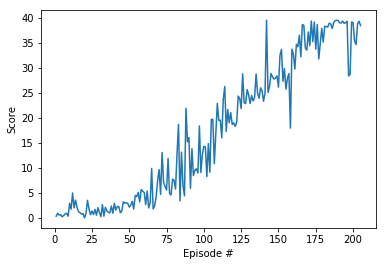

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

## Executing the trained agent to find out how well it has become

The goal here is to achieve an average score of 30 points during 100 episodes using our trained agent

In [8]:
scores = ddpg(n_episodes=100, max_t=1000, print_every=100, noise=False, train=False)

Episode 1	Average Score: 38.27	Steps: 1001
Episode 2	Average Score: 38.46	Steps: 1001
Episode 3	Average Score: 38.78	Steps: 1001
Episode 4	Average Score: 38.94	Steps: 1001
Episode 5	Average Score: 38.68	Steps: 1001
Episode 6	Average Score: 38.77	Steps: 1001
Episode 7	Average Score: 38.53	Steps: 1001
Episode 8	Average Score: 38.49	Steps: 1001
Episode 9	Average Score: 38.44	Steps: 1001
Episode 10	Average Score: 38.52	Steps: 1001
Episode 11	Average Score: 38.61	Steps: 1001
Episode 12	Average Score: 38.65	Steps: 1001
Episode 13	Average Score: 38.64	Steps: 1001
Episode 14	Average Score: 38.65	Steps: 1001
Episode 15	Average Score: 38.70	Steps: 1001
Episode 16	Average Score: 38.45	Steps: 1001
Episode 17	Average Score: 38.50	Steps: 1001
Episode 18	Average Score: 38.47	Steps: 1001
Episode 19	Average Score: 38.47	Steps: 1001
Episode 20	Average Score: 38.39	Steps: 1001
Episode 21	Average Score: 38.45	Steps: 1001
Episode 22	Average Score: 38.34	Steps: 1001
Episode 23	Average Score: 38.39	Steps: 10

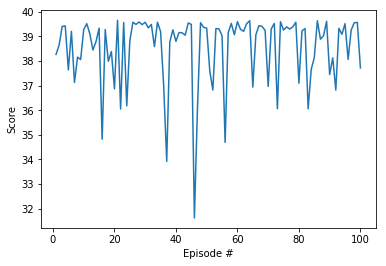

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [ ]:
env.close()